# Softplus Activation Function

**Formula:**  
`f(x) = ln(1 + exp(x))`

**Intuition:**  
Softplus is a smooth approximation of ReLU. Unlike ReLU, which outputs exactly 0 for negative inputs (leading to "dying neurons"), Softplus produces small positive outputs for negative values. This smooth, continuous output ensures neurons remain active and gradients are well-behaved.

**Use Case:**  
- Hidden layers requiring smooth non-linearity  
- Regression or classification tasks with positive outputs  
- Networks where ReLU causes dying neurons  
- Situations needing differentiable activations for smooth gradient-based optimization

**Advantages:**  
- Smooth non-linearity, differentiable everywhere  
- Avoids dying neuron problem  
- Handles negative inputs gracefully  
- Better numerical stability for extreme input values  

**Disadvantages:**  
- Computationally more expensive than ReLU (requires log and exp)  
- Slower convergence compared to ReLU  
- Less popular in practice, ReLU is still often preferred  

**Derivative:**  
`f'(x) = 1 / (1 + exp(-x))`  (i.e., the Sigmoid function)  

**Behavior at Extremes:**  
- As `x → ∞`, Softplus behaves like a linear function: `ln(1 + exp(x)) ≈ x`  
- As `x → -∞`, Softplus approaches 0 smoothly, unlike ReLU which outputs exactly 0

---

## PyTorch Example
```python
import torch
import torch.nn as nn

# Softplus activation
softplus = nn.Softplus()

# Simple neural network using Softplus
class SimpleSoftplusNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # input layer
        self.softplus = nn.Softplus()   # Softplus activation
        self.fc2 = nn.Linear(128, 10)   # output layer
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.softplus(x)
        x = self.fc2(x)
        return x

# Example input
model = SimpleSoftplusNN()
x = torch.randn(32, 784)  # batch of 32 samples
output = model(x)
print(output.shape)  # torch.Size([32, 10])


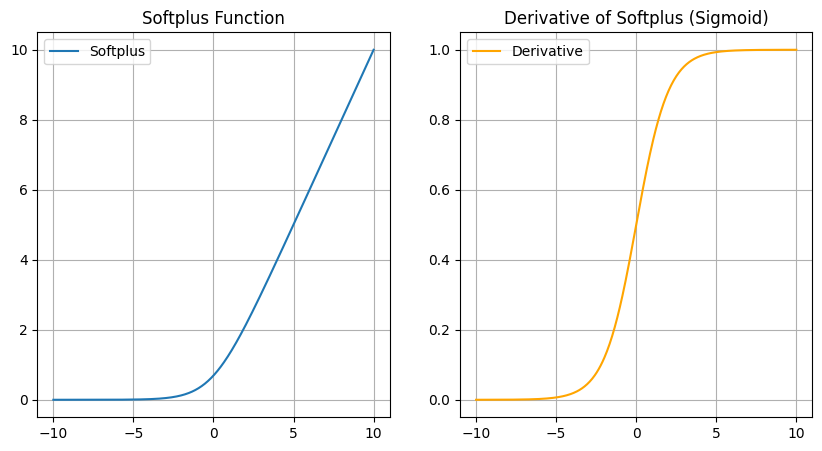

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)
softplus_fn = np.log1p(np.exp(x))  # Softplus
softplus_deriv = 1 / (1 + np.exp(-x))  # derivative (Sigmoid)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x, softplus_fn, label="Softplus")
plt.title("Softplus Function")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, softplus_deriv, label="Derivative", color='orange')
plt.title("Derivative of Softplus (Sigmoid)")
plt.grid(True)
plt.legend()

plt.show()
